#  Decision Tree and Random Forest Case Study 01: Survival Prediction of Titanic Disaster 

We all know very well about the titanic incident. The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912.(source: https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic#:~:text=The%20RMS%20Titanic%20sank%20in%20the%20early%20morning,23%3A40%20%28ship%27s%20time%29%20on%20Sunday%2C%2014%20April%201912.)

As a aspiring machine learning engineer, we should complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

The project is divided into below parts for better understanding
<ul>
1. Defining the problem statement<br>
2. Collecting the data<br>
3. Exploratory data analysis<br>
4. Feature engineering<br>
5. Modelling<br>
6. Testing<br>
</ul>

## 1. Defining Problem Statement

Complete the analysis of what sorts of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [3]:

from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting data 

The required datasets can be downloaded from below kaggle website repository
https://www.kaggle.com/c/titanic/data

We have train and test.csv files. As name suggests, train.csv file is used for modelling and training the model and test.csv file is used to predict if a passenger is survived or perished in that incident.

The both files consist of 12 columns and 891 observations. The columns description is given as below

1. PassengerID
2. Survived - 0 - NotSurvived, 1 - Survived
3. Pclass - 1 - Economical, 2 - Business, 3 - Business Premium
4. Name
5. Sex - Male, Female
6. Age
7. SibSp - Siblings
8. Parch - Parent Child
9. Ticket
10. Fare
11. Cabin - A,B,C,D,E,F,G,T
12. Embarked - S, Q, C

In [5]:
#load the required libraries
#Import the necessary libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning classifier libraries
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
#Loading the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


#### Observation:<br>

Cabin feature in train data has more number of missing values

In [11]:
#Check the train and test data shapes
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (889, 12)
test data shape: (417, 10)


## 3. Exploratory Data Analysis

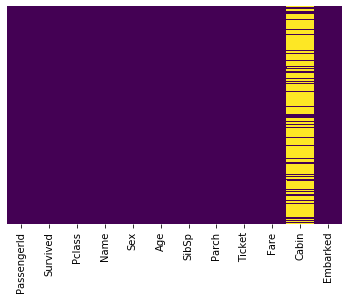

In [12]:
#Check the null values in train data through heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

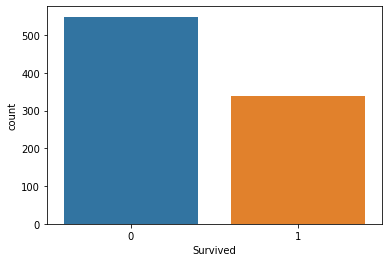

In [13]:
sns.countplot(x="Survived", data=train)

In [14]:
#Lets create a function that generates categorical plots
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

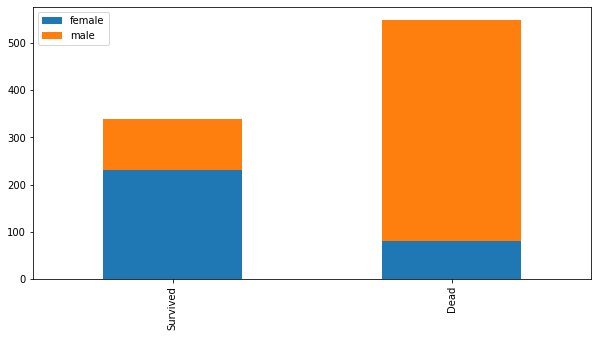

In [15]:
bar_chart('Sex')

#### Observation:<br>
1. Males are the one who had not survived in the incident
2. Females are the one who had survived in the incident

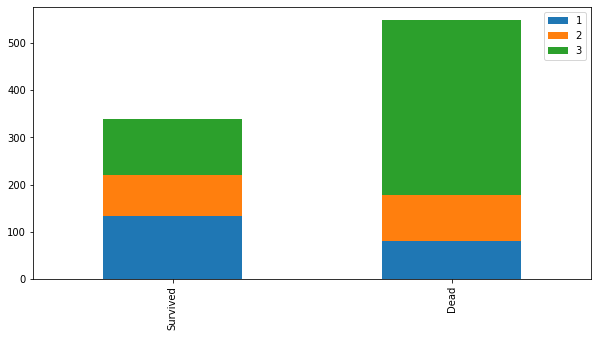

In [16]:
bar_chart('Pclass')

#### Observations:<br>
1. Upperclass people(3) had not survived
2. Surprisingly, lowerclass(1) people had survived

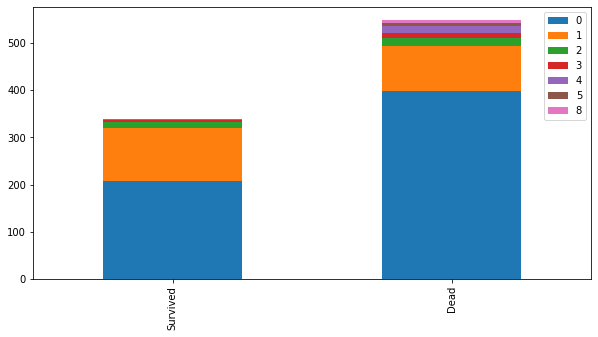

In [17]:
bar_chart('SibSp')

#### Observations:<br>
1. The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
2. The Chart confirms a person aboarded without siblings or spouse more likely dead.

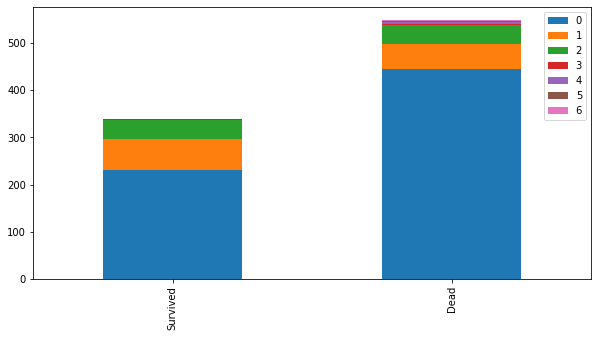

In [18]:
bar_chart('Parch')

#### Observation:<br>
1. The Chart confirms a person aboarded with more than 2 parents or children more likely survived
2. The Chart confirms a person aboarded alone more likely dead

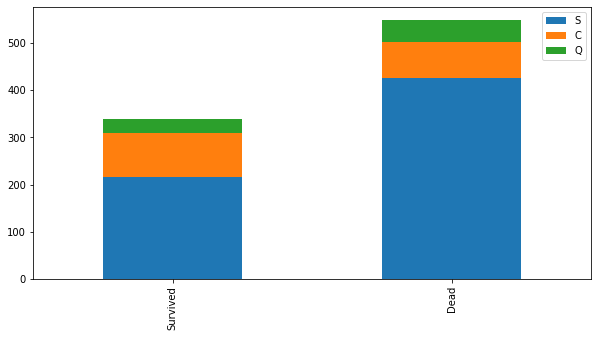

In [19]:
bar_chart('Embarked')

#### Observations:<br>
1. The Chart confirms a person aboarded from C slightly more likely survived
2. The Chart confirms a person aboarded from Q more likely dead
3. The Chart confirms a person aboarded from S more likely dead

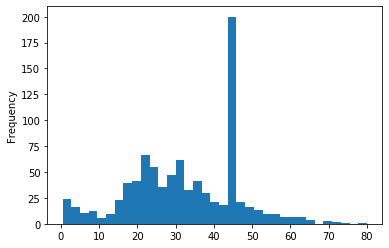

In [20]:
train['Age'].plot.hist(bins=35)

It can be depicted that middle aged group(40 to 50) are most likely perished in accident

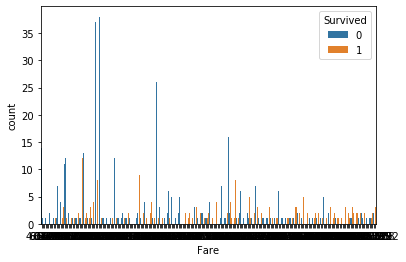

In [21]:
sns.countplot(x="Fare", hue="Survived", data=train)

Most of the people who perished are from thrid class which is cheap fare class tickets

In [22]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   32.699854    0.524184   
std     256.998173    0.486260    0.834700   14.346821    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   32.000000    0.000000   
75%     668.000000    1.000000    3.000000   45.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## 4. Feature Engineering

Converting the age to below categories
child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [23]:
#convert the age to categorical so that our model can understand it. This can be done using a function
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4

In [24]:
#converting the age numerical to categorical
Age = train['Age']
train['Age']= np.array([get_age(x) for x in Age])

In [25]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    2      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    3      1   
2                             Heikkinen, Miss. Laina  female    2      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    3      1   
4                           Allen, Mr. William Henry    male    3      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [26]:
#similarly for fare column
train['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3

In [28]:
#converting the fare numerical to categorical
Fare = train['Fare']
train['Fare']= np.array([get_age(x) for x in Fare])

In [29]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    2      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    3      1   
2                             Heikkinen, Miss. Laina  female    2      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    3      1   
4                           Allen, Mr. William Henry    male    3      0   

   Parch            Ticket  Fare Cabin Embarked  
0      0         A/5 21171     0   NaN        S  
1      0          PC 17599     4   C85        C  
2      0  STON/O2. 3101282     0   NaN        S  
3      0            113803     3  C123        S  
4      0            373450     0   NaN        S

In [30]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [31]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#Converting the sex and embarked columns to categorical
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})

In [33]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1    2      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0    3      1      0   
2                             Heikkinen, Miss. Laina    0    2      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0    3      1      0   
4                           Allen, Mr. William Henry    1    3      0      0   

             Ticket  Fare Cabin  Embarked  
0         A/5 21171     0   NaN         2  
1          PC 17599     4   C85         0  
2  STON/O2. 3101282     0   NaN         2  
3            113803     3  C123         2  
4            373450     0   NaN         2

In [34]:
#Check the percentage of NaN in Cabin column
print("Number of NaN values present in Cabin column is: ", train['Cabin'].isnull().sum(),"which is ", round(train['Cabin'].isnull().sum()/train.shape[0],2), "% of total records")

Number of NaN values present in Cabin column is:  687 which is  0.77 % of total records


In [35]:
#cabin column can be droped as it has too much nan
train.drop('Cabin', axis=1, inplace=True)

In [36]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1    2      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0    3      1      0   
2                             Heikkinen, Miss. Laina    0    2      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0    3      1      0   
4                           Allen, Mr. William Henry    1    3      0      0   

             Ticket  Fare  Embarked  
0         A/5 21171     0         2  
1          PC 17599     4         0  
2  STON/O2. 3101282     0         2  
3            113803     3         2  
4            373450     0         2

In [37]:
#Seems passengerID, Name and ticket columns are nothing to do with prediction of passenger survival.Lets drop those columns
train.drop('Name', axis=1, inplace=True)

In [38]:
train.drop('PassengerId', axis=1, inplace=True)

In [39]:
train.drop('Ticket', axis=1, inplace=True)

In [40]:
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    1    2      1      0     0         2
1         1       1    0    3      1      0     4         0
2         1       3    0    2      0      0     0         2
3         1       1    0    3      1      0     3         2
4         0       3    1    3      0      0     0         2

In [41]:
#lets make our test.csv file as above, and survived column will not be present in test.csv file. 
#We need to convert other columns to above dispalyed dataframe
#Lets have a quick look on test dataframe
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  
0  34.5      0      0   330911   7.8292        Q  
1  47.0      1      0   363272   7.0000        S  
2  62.0      0      0   240276   9.6875        Q  
3  27.0      0      0   315154   8.6625        S  
4  22.0      1      1  3101298  12.2875        S

1. Dropping off ticket and name columns
2. Converting Sex and Embarked categorical to  Numerical 
3. Converting Age and Fare Numerical to Categorical

In [42]:
#dropping off ticket and name columns
test.drop(['Name','Ticket'], axis=1, inplace=True)

In [43]:
#converting sex and embarked columns from categorical to numerical
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test['Embarked'] = test['Embarked'].map({'C':0,'Q':1,'S':2})

In [44]:
#Converting Age and Fare Numerical to Categorical
Fare = test['Fare']
Age = test['Age']
test['Fare']= np.array([get_age(x) for x in Fare])
test['Age']= np.array([get_age(x) for x in Age])

In [45]:
test.head()

PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0          892       3    1    3      0      0     0         1
1          893       3    0    3      1      0     0         2
2          894       2    1    4      0      0     0         1
3          895       3    1    2      0      0     0         2
4          896       3    0    2      1      1     1         2

## 5. Modelling

### Decision Tree

In [46]:
#Assign the data to variables
X = train.drop('Survived', axis=1)
y = train['Survived']

#Compute the shapes
print("Shape of X: ",X.shape)
print()
print("Shape of y: ",y.shape)

Shape of X:  (889, 7)

Shape of y:  (889,)


In [47]:
#build the model
tree_model_one = DecisionTreeClassifier(max_depth=14, random_state=5)

#fit the model with training data
tree_model_one.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [48]:
text_representation = tree.export_text(tree_model_one)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_5 <= 2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- featu

In [49]:
#tree visualization
with open("Dtree1.dot","w") as f:
    f = tree.export_graphviz(tree_model_one, feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], out_file=f)

In [55]:
fig = plt.figure(figsize=(300,250))
_ = tree.plot_tree(tree_model_one, filled=True)

In [56]:
#Print the accuracy
print(tree_model_one.score(X,y))

0.8841394825646794


## 6. Testing

In [57]:
#lets load the test features
test_features = test.drop('PassengerId', axis=1)
print(test_features.shape)

(417, 7)


In [58]:
#print the predictions by inputing the test features to trained model
test_preds = tree_model_one.predict(test_features)
predicted_output = pd.DataFrame({"PassengerID":test['PassengerId'], "Survived":test_preds})

In [59]:
#print the csv file using tofile function
predicted_output.to_csv("Output1.csv", index=False)

## Pruning the model with Random Forest Classifier

In [60]:
#lets take independent variables seperately to find which predictor is important for prediciting the survival of passenger.
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

#Develop the model
rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True, max_features=2)

#fit the model with above defined features
rf_model.fit(X=train[features], y=train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
#Printing the oob score
print("OOB Score: ", rf_model.oob_score_)

OOB Score:  0.8053993250843644


In [62]:
for feature, imp in zip(features, rf_model.feature_importances_):
    print(feature, imp)

Pclass 0.1329212176174272
Sex 0.37385537300248756
Age 0.1340254184304946
SibSp 0.08905164333832567
Parch 0.07274794995348023
Fare 0.13479367477582807
Embarked 0.06260472288195679


From above features, it can be depicted that, Sex, Age, Fare and Pclass are important features which highly effect the survival of a passenger

Running the decision tree model again, with the above important features to check if model performance is increased

In [63]:
#Assign the data to variables
X = train[['Age','Fare','Sex','Pclass']]
y = train['Survived']

#Compute the shapes
print("Shape of X: ",X.shape)
print()
print("Shape of y: ",y.shape)

Shape of X:  (889, 4)

Shape of y:  (889,)


In [70]:
#build the model
tree_model_two = DecisionTreeClassifier(max_depth=8, random_state=5)

#fit the model with training data
tree_model_two.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [71]:
#tree visualization
with open("Dtree2.dot","w") as f:
    f = tree.export_graphviz(tree_model_two, feature_names=['Pclass','Sex','Age','Pclass'], out_file=f)

In [72]:
#Print the accuracy
print(tree_model_two.score(X,y))

0.8335208098987626


In [73]:
text_representation = tree.export_text(tree_model_two)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_3 <= 2.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |  

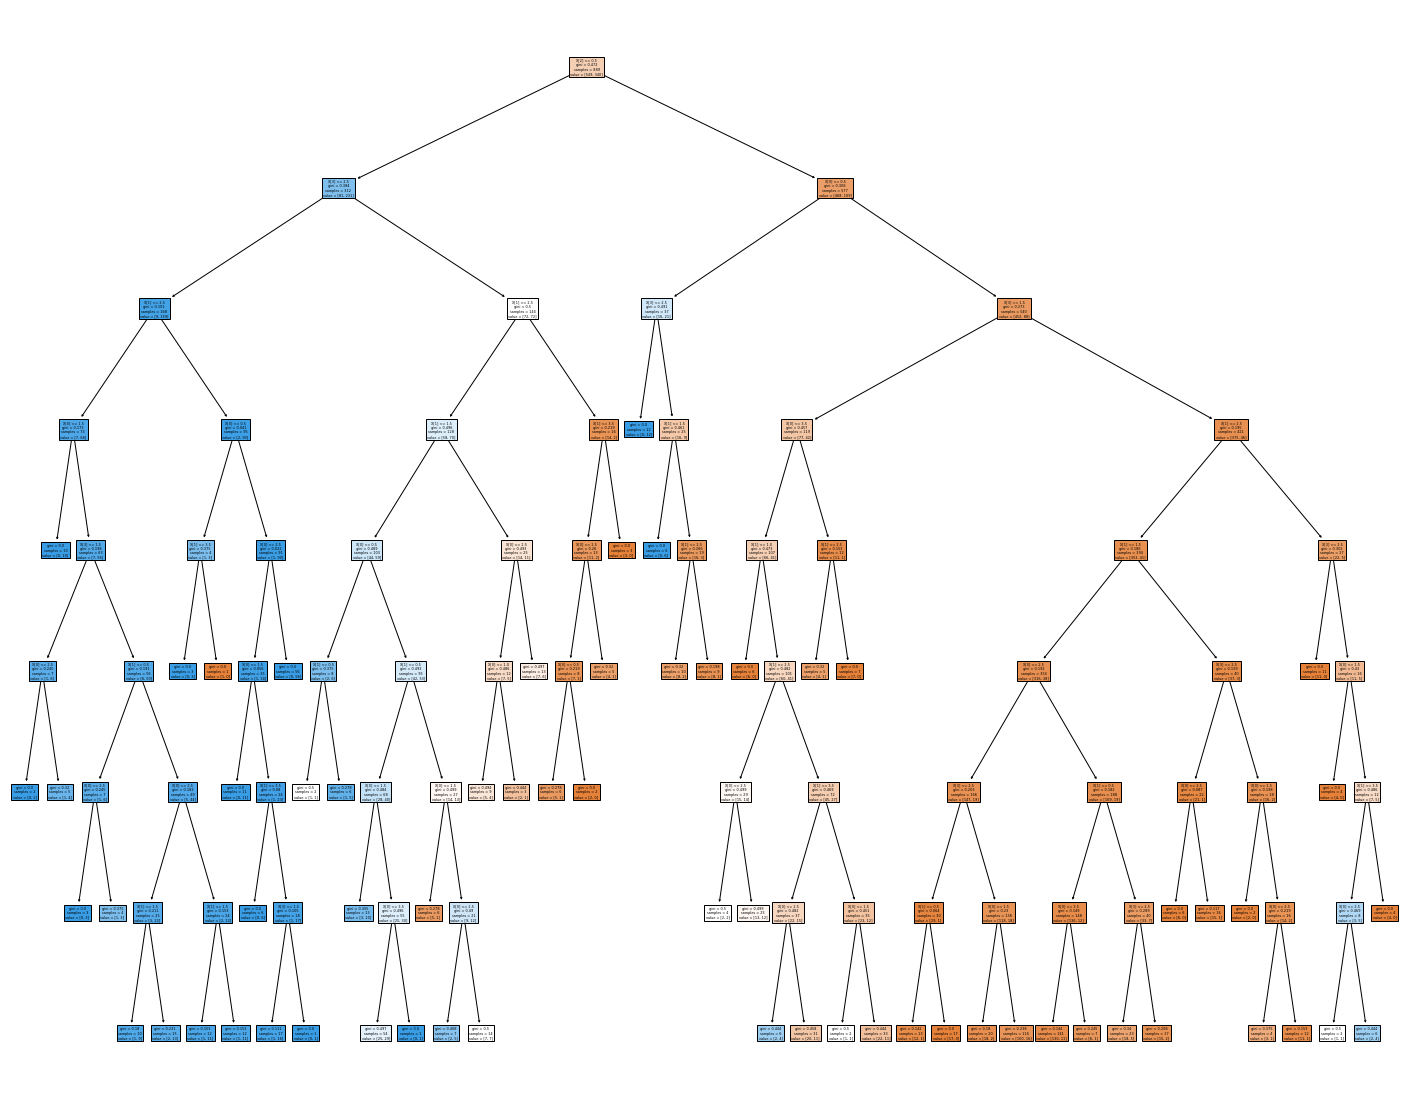

In [74]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model_two, filled=True)

In [75]:
fig.savefig("decision_tree.png")

### Rules for decision tree

1. The probability that passenger is not survived if:
> 1.1 age is less than or equal to 0.5<br>
> 1.2 pclass is less than or equal to 2.5<br>
> 1.3 sex is less than 2.5 and pclass is less than or equal to 1.5<br>
> 1.4 pclass of passenger is not less than or equal to 1.5 and sex of passenger is less than 0.5<br>
> 1.5 if sex of passenger is less than 0.5 and pclass of ths passenger should be less than 2.5, then passenger is survived else passenger is perished<br>
> 1.5 if sex of passenger is not less than 0.5 and pclass of ths passenger should be less than or equal to 2.5. <br>
> 1.6 If pclass of passenger is less than or equal to 2.5 and sex of passenger is less than or equal to 2.5, then passenger is survived else passenger is dead.<br>
> 1.7 If sex is less than 2.5 and pclass is less than or equal to 0.5 and sex of passenger is less than or equal to 3.5<br>
> 1.8 If sex is not less than or equal to 3.5 but pclass of passenger is less than or equa to 1.5, then passenger is perished.<br>
> 1.9 If age is not less than or equal to 0.5, pclass of passenger is less than or equal to 1.5 and 2.5 <br>
> 1.10 If pclass of passenger is not 2.5, sex of passenger is less than 2.5, then passenger is perished or not survived.<br>
